# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, r'C:\Users\pyann\Dropbox (CEDIA)\CPR\Model')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [2]:
from CPR import analysis

inputs = analysis.get_dataset()

inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1956.0,female,70.0,post-secondary,45000.0,NaN,323.660714,776.119403,25000.000000,NaN,0.0,0.014925,0.000000,NaN,323.660714,0.000000,0.0,NaN,NaN,NaN,NaN,12000.0,0.0,0.0,1966.0,male,65.0,university,90000.0,NaN,29117.647059,5400.000000,NaN,NaN,0.001176,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,NaN,50000.0,NaN,50000.0,NaN,NaN,0.000000,1.000000,0.000000,0.009545,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1981.0,male,55.0,university,75000.0,NaN,NaN,1018.867925,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,1963.0,female,67.0,university,37000.0,NaN,11769.230769,NaN,NaN,43333.333333,0.030769,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.24,0.05,NaN,NaN,NaN,NaN,1,True,on,235000.0,NaN,235000.0,NaN,NaN,NaN,0.926829,0.043902,0.029268,0.024098,0.000732,1000.0,NaN,4400.0,32000.0,NaN,191000.0,NaN,NaN,0.0,NaN,410.0,785.0,NaN,1400.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
2,1967.0,male,67.0,university,70000.0,NaN,12000.000000,3634.000000,NaN,NaN,0.0,0.082713,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,300000.0,NaN,300000.0,NaN,NaN,NaN,0.000000,0.814815,0.185185,0.000972,0.000926,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
3,1977.0,male,55.0,high school,62000.0,NaN,NaN,50000.000000,4819.587629,NaN,NaN,0.000000,0.012371,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,female,60.0,university,51000.0,NaN,155555.555556,2777.777778,15107.913669,NaN,0.081481,0.014815,0.008993,NaN,0.0,0.0,0.0,NaN,NaN,NaN,20000.0,646000.0,0.08,0.1,1,True,on,235000.0,NaN,235000.0,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.023000,0.023000,10000.0,NaN,NaN,NaN,16000.0,225000.0,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,250.0,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
4,1961.0,male,65.0,university,30000.0,NaN,NaN,3157.894737,312.500000,45000.0,NaN,0.000000,0.000000,0.05,NaN,1263.157895,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,1000.0,NaN,1000.0,NaN,NaN,NaN,0.400000,0.000000,0.600000,0.015000,0.009000,NaN,NaN,NaN,19000.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,300.0,NaN,0.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


# Run model
Deterministic model and stochastic model with 25 simulations

In [3]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True)
res_deter.summarize()


total time: 88.86600995063782

Deterministic Model


In [4]:
res_stoch = main.run_simulations(inputs, 25, non_stochastic=False)
res_stoch.summarize()


total time: 678.1452362537384

Stochastic Model, 25 simulations


# Analyse results

## See output

In [5]:
res_deter.output.head()

,hh_index,sim,wage_bef,pension_bef,s_wage_bef,s_pension_bef,second_residence_bef,cons_bef,rpp_dc_bef,unreg_balance_bef,rrsp_balance_bef,tfsa_balance_bef,other_reg_balance_bef,s_unreg_balance_bef,s_rrsp_balance_bef,s_tfsa_balance_bef,wage_part,pension_part,s_wage_part,s_pension_part,second_residence_part,rpp_dc_part,unreg_balance_part,rrsp_balance_part,tfsa_balance_part,other_reg_balance_part,s_unreg_balance_part,s_rrsp_balance_part,s_tfsa_balance_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,wage_after,pension_after,s_wage_after,s_pension_after,second_residence_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,cons_after,cpp_after,gis_after,oas_after,s_cpp_after,s_gis_after,s_oas_after,first_residence_bef,first_mortgage_balance_bef,first_residence_part,first_mortgage_balance_part,first_residence_after,first_mortgage_balance_after,s_rpp_db_benefits_after,rpp_db_benefits_after,s_rpp_dc_bef,s_other_reg_balance_bef,s_rpp_dc_part,s_other_reg_balance_part,business_bef,business_after,business_part
0,0,0,45000.000000,NaN,90000.000000,NaN,51020.4,94937.780654,11325.8448,0.000000,2.426337,1453.579408,25187.413636,0.00000,29441.811176,5440.481345,0.000000,NaN,67662.845117,NaN,58176.811638,0.0,0.0,0.0,0.000000,0.0,0.000000,30076.134837,5421.768865,1686.908131,982.261441,380.972111,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,61039.15741,1686.908131,982.261441,380.972111,1861.308983,0.000000,332.301075,50828.428301,20347.526583,0.000000,7121.31,16339.522220,0.0,7121.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,75000.000000,NaN,37000.000000,NaN,NaN,53980.056387,NaN,0.000000,NaN,1017.366193,NaN,43170.00000,12890.345380,0.000000,83627.507139,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,1056.437687,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1411.482385,0.0,2506.290349,0.0,NaN,0.0,NaN,NaN,0.000000,0.000000,49.142750,1411.482385,0.000000,2506.290349,62638.816227,12164.763057,0.000000,7121.31,12106.528226,0.0,7121.31,239795.880000,179734.089685,292621.720625,14605.700264,256169.936825,0.000000,26029.099873,28.718728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,62779.185197,NaN,NaN,NaN,NaN,42238.881824,NaN,293.782845,12823.105881,32130.413035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1019.613111,0.000000,5814.221255,NaN,NaN,NaN,31208.651325,18800.503781,0.000000,7121.31,NaN,NaN,NaN,326171.555067,NaN,NaN,NaN,385348.679299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,59416.157213,NaN,49391.621277,NaN,NaN,63824.199272,NaN,0.000000,NaN,80172.495450,22569.212606,1319.56652,249581.118082,112665.135133,0.000000,NaN,48161.764296,NaN,NaN,NaN,0.0,NaN,0.000000,0.0,1373.269545,261171.540368,122899.866117,1038.202113,0.000000,3687.999915,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,NaN,1038.202113,0.000000,3687.999915,17563.862375,72222.833864,8768.595894,113568.041386,10637.105072,0.000000,7121.31,9435.214167,0.0,7121.31,297626.267415,123462.148886,302716.404195,116108.848692,292589.284124,32538.319873,12190.617411,NaN,1.145788e+06,24224.782798,1.197320e+06,25345.202752,NaN,NaN,NaN
4,4,0,30000.000000,NaN,NaN,NaN,NaN,21296.406229,NaN,42804.000000,NaN,1717.327579,294.943875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,23.234770,0.000000,3790.705150,NaN,NaN,NaN,24893.949103,8712.171709,4578.849167,7121.31,NaN,NaN,NaN,1020.408000,978.586224,NaN,NaN,1121.540779,711.429407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge with input and check preparedness

In [6]:
res_deter.check_preparedness()
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 77.10000000000001%


## RRI distribution

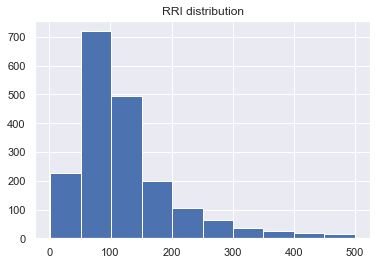

In [7]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [8]:
res_stoch.check_preparedness()
df = res_stoch.df_merged

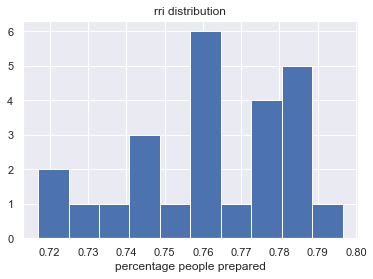

In [9]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments

### Selling first residence

In [12]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2018,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'gr_rrsp_limit': 0.03,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'gr_tfsa_limit': 0.02,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp': 0.4,
 'mix_equity_rpp': 0.6,
 'perc_year_db': 0.02,
 'n_best_wages_db': 5,
 'db_offset': 600.0,
 'db_benefit_multiplier': 9.0,
 'db_minimum_age': 55,
 'db_ret_age_no

In [15]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       sell_first_resid=False)
res_not_selling.summarize()
res_not_selling.check_preparedness()
df = res_not_selling.df_merged

print(f'\npercentage people prepared without selling house: {df.prepared.mean() * 100:.2f}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   sell_first_resid=True)
res_selling.summarize()
res_selling.check_preparedness()
df = res_selling.df_merged

print(f'\npercentage people prepared when selling house: {df.prepared.mean() * 100:.2f}%')


total time: 30.604037046432495

Deterministic Model

Extra parameters:
sell_first_resid: False

percentage people prepared without selling house: 77.10%

total time: 35.17367696762085

Deterministic Model

Extra parameters:
sell_first_resid: True

percentage people prepared when selling house: 79.05%


In [16]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.1041,
 'mu_equity': 0.0688,
 'rho_equity': 0.0,
 'sig_equity': 0.2179,
 'ret_dividends': 0.0417,
 'ret_bills_2018': -0.0029,
 'mu_bills': 0.0103,
 'rho_bills': 0.5756,
 'sig_bills': 0.06,
 'ret_bonds_2018': 0.0062,
 'mu_bonds': 0.0253,
 'rho_bonds': 0.3219,
 'sig_bonds': 0.1069,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.1041,
 'mu_business': 0.0688,
 'rho_business': 0.0,
 'sig_business': 0.2179,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[0.017042  ],
        [0.02317441],
        [0.02672097],
        [0.02876795],
        [0.02994804],
        [0.03062791],
        [0.0310

In [17]:
mu_equity_bm = res_deter.prices.mu_equity
mu_bills_bm = res_deter.prices.mu_bills
mu_bonds_bm = res_deter.prices.mu_bonds

factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                               mu_equity=factor * mu_equity_bm,
                               mu_bills=factor * mu_bills_bm,
                               mu_bonds=factor * mu_bonds_bm)
    res.check_preparedness()
    l_prepared.append(res.df_merged.prepared.mean())    


total time: 32.74730086326599

total time: 31.292771339416504

total time: 32.22051548957825

total time: 31.1283118724823

total time: 34.74231505393982

total time: 40.68005657196045

total time: 37.208595275878906

total time: 38.30198121070862

total time: 42.235373735427856

total time: 34.32515239715576


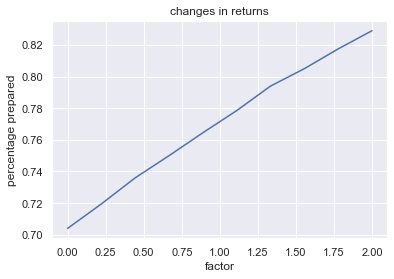

In [18]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

# Using CPR with other inputs

More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [19]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
0,1956.0,female,70.0,post-secondary,45000.0,NaN,323.660714,776.119403,25000.000000,NaN,0.0,0.014925,0.000000,NaN,323.660714,0.000000,0.0,NaN,NaN,NaN,NaN,12000.0,0.0,0.0,1966.0,male,65.0,university,90000.0,NaN,29117.647059,5400.000000,NaN,NaN,0.001176,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,NaN,50000.0,NaN,50000.0,NaN,NaN,0.000000,1.000000,0.000000,0.009545,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
1,1981.0,male,55.0,university,75000.0,NaN,NaN,1018.867925,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,1963.0,female,67.0,university,37000.0,NaN,11769.230769,NaN,NaN,43333.333333,0.030769,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.24,0.05,NaN,NaN,NaN,NaN,1,True,on,235000.0,NaN,235000.0,NaN,NaN,NaN,0.926829,0.043902,0.029268,0.024098,0.000732,1000.0,NaN,4400.0,32000.0,NaN,191000.0,NaN,NaN,0.0,NaN,410.0,785.0,NaN,1400.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
2,1967.0,male,67.0,university,70000.0,NaN,12000.000000,3634.000000,NaN,NaN,0.0,0.082713,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,300000.0,NaN,300000.0,NaN,NaN,NaN,0.000000,0.814815,0.185185,0.000972,0.000926,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
3,1977.0,male,55.0,high school,62000.0,NaN,NaN,50000.000000,4819.587629,NaN,NaN,0.000000,0.012371,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,female,60.0,university,51000.0,NaN,155555.555556,2777.777778,15107.913669,NaN,0.081481,0.014815,0.008993,NaN,0.0,0.0,0.0,NaN,NaN,NaN,20000.0,646000.0,0.08,0.1,1,True,on,235000.0,NaN,235000.0,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.023000,0.023000,10000.0,NaN,NaN,NaN,16000.0,225000.0,NaN,NaN,1200.0,NaN,NaN,NaN,1200.0,250.0,NaN,NaN,65.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
4,1961.0,male,65.0,university,30000.0,NaN,NaN,3157.894737,312.500000,45000.0,NaN,0.000000,0.000000,0.05,NaN,1263.157895,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,1000.0,NaN,1000.0,NaN,NaN,NaN,0.400000,0.000000,0.600000,0.015000,0.009000,NaN,NaN,NaN,19000.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,300.0,NaN,0.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


In [23]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [24]:
my_inputs = pd.read_csv('my_inputs.csv')

In [25]:
my_res = main.run_simulations(my_inputs, 100, non_stochastic=False)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)


total time: 6.78795313835144


False    1.0
Name: prepared, dtype: float64

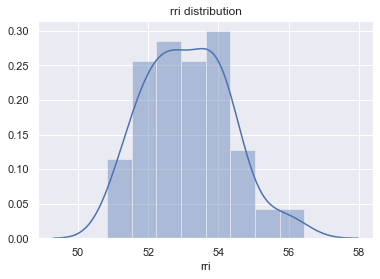

In [26]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()